In [1]:
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import random
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, ZeroPadding2D, Dropout
from tensorflow.keras.callbacks  import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#tf.debugging.set_log_device_placement(True)

In [3]:
root_dir = "/content/drive/MyDrive/chest_xray"

for dirpath, dirnames, filenames in os.walk(root_dir):
  print(f'Directory : {dirpath}')
  print(f'number of images : {len(filenames)}')
  print(' ')

Directory : /content/drive/MyDrive/chest_xray
number of images : 0
 
Directory : /content/drive/MyDrive/chest_xray/test
number of images : 0
 
Directory : /content/drive/MyDrive/chest_xray/test/NORMAL
number of images : 234
 
Directory : /content/drive/MyDrive/chest_xray/test/PNEUMONIA
number of images : 390
 
Directory : /content/drive/MyDrive/chest_xray/train
number of images : 0
 
Directory : /content/drive/MyDrive/chest_xray/train/PNEUMONIA
number of images : 3875
 
Directory : /content/drive/MyDrive/chest_xray/train/NORMAL
number of images : 1341
 
Directory : /content/drive/MyDrive/chest_xray/val
number of images : 0
 
Directory : /content/drive/MyDrive/chest_xray/val/NORMAL
number of images : 8
 
Directory : /content/drive/MyDrive/chest_xray/val/PNEUMONIA
number of images : 8
 


In [4]:
def get_labels(train_dir,test_dir):
  train_labels = os.listdir(train_dir)
  test_labels = os.listdir(test_dir)
  print(train_labels)
  print(test_labels)

In [5]:
train_dir = '/content/drive/MyDrive/chest_xray/train'
test_dir = '/content/drive/MyDrive/chest_xray/test'
val_dir = '/content/drive/MyDrive/chest_xray/val'

get_labels(train_dir,test_dir)

['PNEUMONIA', 'NORMAL']
['NORMAL', 'PNEUMONIA']


In [6]:
# Data exploration and images visualization
def random_imagee(target_dir, num_images):
  subdirs = [d for d in os.listdir(target_dir) if os.path.isdir(os.path.join(target_dir, d))]  #list of subdirectories
  print('list of subdirectiories',subdirs)
  random.shuffle(subdirs)
  selected_subdirs = subdirs[:num_images]
  fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

  for i, subdirs in enumerate(selected_subdirs):
    image_path = [f for f in os.listdir(os.path.join(target_dir, subdirs))]
    random_img = random.choice(image_path)
    img = mpimg.imread(os.path.join(target_dir, subdirs, random_img))
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(subdirs)

  print(f'shape of image: {img.shape}')
  plt.show()

list of subdirectiories ['PNEUMONIA', 'NORMAL']
shape of image: (1008, 1200)


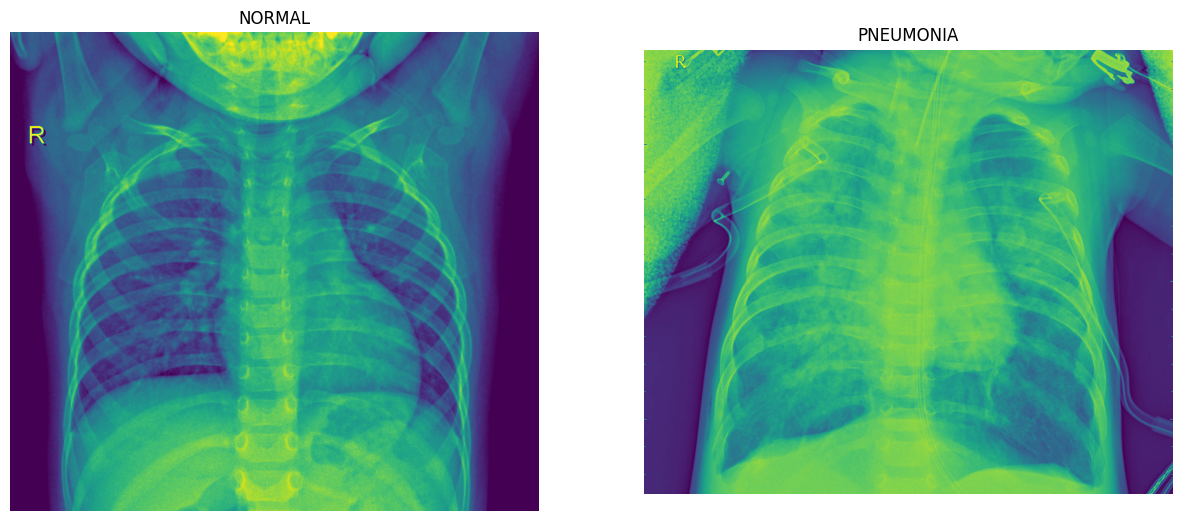

In [14]:
random_imagee(train_dir,2)

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, batch_size=64, target_size=(224,224), class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, batch_size=64, target_size=(224,244), class_mode='binary')
val_data = val_datagen.flow_from_directory(val_dir, batch_size=64, target_size=(224,224), class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Building model

In [9]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(1050, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(train_data, epochs=20, validation_data=val_data, callbacks=[EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 1067s 12s/step - accuracy: 0.7444 - loss: 0.9776 - val_accuracy: 0.8125 - val_loss: 0.4012
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 888s 10s/step - accuracy: 0.9641 - loss: 0.0964 - val_accuracy: 0.6250 - val_loss: 1.1275
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 857s 10s/step - accuracy: 0.9661 - loss: 0.0954 - val_accuracy: 0.6250 - val_loss: 0.8967
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 833s 10s/step - accuracy: 0.9705 - loss: 0.0819 - val_accuracy: 1.0000 - val_loss: 0.1339
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 864s 10s/step - accuracy: 0.9785 - loss: 0.0655 - val_accuracy: 1.0000 - val_loss: 0.0298
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 845s 10s/step - accuracy: 0.9696 - loss: 0.0740 - val_accuracy: 0.8125 - val_loss: 0.5782
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 844s 10s/step - accuracy: 0.9837 - loss: 0.0427 - val_accuracy: 0.8125 - val_loss: 0.7649


Transfer Learning as feature extractor

In [11]:
from tensorflow.keras.applications import InceptionV3, MobileNet, VGG16, ResNet50

#VGG16

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the layers for transfer learning | Feature Extractor

for layer in vgg16.layers:
  layer.trainable = False

model_2 = Sequential([
    vgg16,
    Flatten(),
    Dense(1050, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_2 = model_2.fit(train_data, validation_data=val_data, epochs=10, callbacks=[EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
 3/82 ━━━━━━━━━━━━━━━━━━━━ 51:10 39s/step - accuracy: 0.4219 - loss: 5.5494

KeyboardInterrupt: 

In [10]:
# ModileNet
mobilenet = MobileNet(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in mobilenet.layers:
  layer.trainable = False

model_3 = Sequential([
    mobilenet,
    Flatten(),
    Dense(1050, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_3 = model_3.fit(train_data, validation_data=val_data, epochs=10, callbacks=[EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)])

NameError: name 'MobileNet' is not defined

Transfer learning as finetune model

In [ ]:
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

# unfreezing the last 50 layers
for layer in inception.layers[-50:]:
  layer.trainable = True

model_4 = Sequential([
    inception,
    Flatten(),
    Dense(1050, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_4 = model_4.fit(train_data, validation_data=val_data, epochs=10, callbacks=[EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)])